# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [433]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
cities = cities
url = "http://api.openweathermap.org/data/2.5/weather?"
city = 'Toronto'
uom = 'metric'
citiestest = ['Seoul','Beijing','New York','Tianjin']

cityList = pd.DataFrame(cities, columns=['City'])

Processing results for index zavodoukovsk
Processing results for index anadyr
Processing results for index illoqqortoormiut
Processing results for index agirish
Processing results for index port alfred
Processing results for index busselton
Processing results for index ushuaia
Processing results for index vestmannaeyjar
Processing results for index lengshuijiang
Processing results for index mataura
Processing results for index hobart
Processing results for index curup
Processing results for index port elizabeth
Processing results for index cuajinicuilapa
Processing results for index bonthe
Processing results for index mezen
Processing results for index samusu
Processing results for index longyearbyen
Processing results for index taksimo
Processing results for index faanui
Processing results for index cherskiy
Processing results for index oussouye
Processing results for index lebu
Processing results for index san luis
Processing results for index olinda
Processing results for index conc

In [34]:
#weather = requests.get(url,params).json()

In [122]:
#cityList
cityList.to_csv(r'cityList.csv')

In [131]:
city_df = pd.read_csv('cityList.csv',index_col=[0])

In [432]:
lengthofrow = len(city_df)

In [133]:
weather

{'coord': {'lon': 66.54, 'lat': 56.51},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'model',
 'main': {'temp': -9.21,
  'pressure': 1030,
  'humidity': 92,
  'temp_min': -9.21,
  'temp_max': -9.21,
  'sea_level': 1030,
  'grnd_level': 1019},
 'wind': {'speed': 1.38, 'deg': 225},
 'clouds': {'all': 0},
 'dt': 1572801634,
 'sys': {'country': 'RU', 'sunrise': 1572749132, 'sunset': 1572781751},
 'timezone': 18000,
 'id': 1485357,
 'name': 'Zavodoukovsk',
 'cod': 200}

In [134]:
#cityTest = 'zavodoukovsk'
#query_url = url+'appid='+api_key+"&q="+cityTest+"&units=metric"
#weather = requests.get(query_url).json()
#weather
#country -------- weather['sys']['country']
#date ------------weather['dt']
#humidity --------weather['main']['humidity']
#longitude -------weather['coord']['lon']
#latitude --------weather['coord']['lat']
#max_temp --------weather['main']['temp_max']
#wind_speed ------weather['wind']['speed']

In [135]:
city_df['Cloudiness'] = ''
city_df['Country'] = ''
city_df['Date'] = ''
city_df['Humidity'] = ''
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Max Temp'] = ''
city_df['Wind Speed'] = ''

In [136]:
city_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,zavodoukovsk,,,,,,,,
1,anadyr,,,,,,,,
2,illoqqortoormiut,,,,,,,,
3,agirish,,,,,,,,
4,port alfred,,,,,,,,
5,busselton,,,,,,,,
6,ushuaia,,,,,,,,
7,vestmannaeyjar,,,,,,,,
8,lengshuijiang,,,,,,,,
9,mataura,,,,,,,,


In [137]:
#date ------------response['dt']
#humidity --------response['main']['humidity']
#longitude -------response['coord']['lon']
#latitude --------response['coord']['lat']
#max_temp --------response['main']['temp_max']
#wind_speed ------response['wind']['speed']

for index, row in city_df.iterrows():
    city = row['City']
    params = {
    'units': uom
    ,'appid': api_key
    ,'q': city
    }
    print(f'Processing Record {index} set of {lengthofrow} | {city}')
    response = requests.get(url,params=params).json()
    
    try:
        city_df.loc[index,'Cloudiness']=response['clouds']['all']
        city_df.loc[index,'Country']=response['sys']['country']
        city_df.loc[index,'Date']=response['dt']
        city_df.loc[index,'Humidity']=response['main']['humidity']
        city_df.loc[index,'Longitude']=response['coord']['lon']
        city_df.loc[index,'Latitude']=response['coord']['lat']
        city_df.loc[index,'Max Temp']=response['main']['temp_max']
        city_df.loc[index,'Wind Speed']=response['wind']['speed']
    except KeyError:
        print('missing values, i am going to skip it')
        print('====================================')

city_df
    

Processing Record i set of 1 | zavodoukovsk with index of 0
Processing Record i set of 1 | anadyr with index of 1
Processing Record i set of 1 | illoqqortoormiut with index of 2
missing value, i am going to skip it
Processing Record i set of 1 | agirish with index of 3
Processing Record i set of 1 | port alfred with index of 4
Processing Record i set of 1 | busselton with index of 5
Processing Record i set of 1 | ushuaia with index of 6
Processing Record i set of 1 | vestmannaeyjar with index of 7
Processing Record i set of 1 | lengshuijiang with index of 8
Processing Record i set of 1 | mataura with index of 9
Processing Record i set of 1 | hobart with index of 10
Processing Record i set of 1 | curup with index of 11
Processing Record i set of 1 | port elizabeth with index of 12
Processing Record i set of 1 | cuajinicuilapa with index of 13
Processing Record i set of 1 | bonthe with index of 14
Processing Record i set of 1 | mezen with index of 15
Processing Record i set of 1 | samusu

Processing Record i set of 1 | alyangula with index of 131
Processing Record i set of 1 | bengkulu with index of 132
missing value, i am going to skip it
Processing Record i set of 1 | utiroa with index of 133
missing value, i am going to skip it
Processing Record i set of 1 | biak with index of 134
Processing Record i set of 1 | klaksvik with index of 135
Processing Record i set of 1 | miragoane with index of 136
Processing Record i set of 1 | cabo san lucas with index of 137
Processing Record i set of 1 | perpignan with index of 138
Processing Record i set of 1 | mareeba with index of 139
Processing Record i set of 1 | tasiilaq with index of 140
Processing Record i set of 1 | belushya guba with index of 141
missing value, i am going to skip it
Processing Record i set of 1 | susuman with index of 142
Processing Record i set of 1 | ilave with index of 143
Processing Record i set of 1 | taldan with index of 144
Processing Record i set of 1 | chuy with index of 145
Processing Record i se

Processing Record i set of 1 | rolim de moura with index of 257
missing value, i am going to skip it
Processing Record i set of 1 | itarema with index of 258
Processing Record i set of 1 | caxias with index of 259
Processing Record i set of 1 | provideniya with index of 260
Processing Record i set of 1 | storforshei with index of 261
Processing Record i set of 1 | katsuura with index of 262
Processing Record i set of 1 | lagunas with index of 263
Processing Record i set of 1 | samalaeulu with index of 264
missing value, i am going to skip it
Processing Record i set of 1 | puerto maldonado with index of 265
Processing Record i set of 1 | souillac with index of 266
Processing Record i set of 1 | athabasca with index of 267
Processing Record i set of 1 | norman wells with index of 268
Processing Record i set of 1 | constitucion with index of 269
Processing Record i set of 1 | esperance with index of 270
Processing Record i set of 1 | winneba with index of 271
Processing Record i set of 1 

Processing Record i set of 1 | aripuana with index of 382
Processing Record i set of 1 | tuku with index of 383
Processing Record i set of 1 | coracora with index of 384
Processing Record i set of 1 | ndjole with index of 385
Processing Record i set of 1 | sorvag with index of 386
missing value, i am going to skip it
Processing Record i set of 1 | hami with index of 387
Processing Record i set of 1 | alofi with index of 388
Processing Record i set of 1 | makakilo city with index of 389
Processing Record i set of 1 | hamilton with index of 390
Processing Record i set of 1 | ust-karsk with index of 391
Processing Record i set of 1 | phumi samraong with index of 392
missing value, i am going to skip it
Processing Record i set of 1 | lahaina with index of 393
Processing Record i set of 1 | beira with index of 394
Processing Record i set of 1 | jiblah with index of 395
Processing Record i set of 1 | banmo with index of 396
missing value, i am going to skip it
Processing Record i set of 1 | 

Processing Record i set of 1 | miraflores with index of 506
Processing Record i set of 1 | labuan with index of 507
Processing Record i set of 1 | brae with index of 508
Processing Record i set of 1 | naigarhi with index of 509
Processing Record i set of 1 | puerto escondido with index of 510
Processing Record i set of 1 | marawi with index of 511
Processing Record i set of 1 | paka with index of 512
Processing Record i set of 1 | methoni with index of 513
Processing Record i set of 1 | gamba with index of 514
Processing Record i set of 1 | zhigansk with index of 515
Processing Record i set of 1 | temir with index of 516
Processing Record i set of 1 | oyama with index of 517
Processing Record i set of 1 | sao joao da barra with index of 518
Processing Record i set of 1 | kwinana with index of 519
Processing Record i set of 1 | port augusta with index of 520
Processing Record i set of 1 | kandalaksha with index of 521
Processing Record i set of 1 | severnyy with index of 522
missing val

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,zavodoukovsk,0,RU,1572803240,92,56.51,66.54,-9.21,1.38
1,anadyr,2,RU,1572803240,92,64.73,177.51,-8,2
2,illoqqortoormiut,,,,,,,,
3,agirish,8,RU,1572803240,94,61.92,63.02,-7.26,2.06
4,port alfred,17,ZA,1572803240,77,-33.59,26.89,19.44,2.24
5,busselton,13,AU,1572803240,67,-33.64,115.35,9.44,2.84
6,ushuaia,75,AR,1572803241,45,-54.81,-68.31,10,17
7,vestmannaeyjar,75,IS,1572803241,69,63.44,-20.27,4,12.9
8,lengshuijiang,0,CN,1572803241,68,27.66,111.45,13.29,1.5
9,mataura,8,NZ,1572803241,64,-46.19,168.86,12.22,1.14


In [431]:
city_df.head(15)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,zavodoukovsk,0,RU,1572803240,92,56.51,66.54,-9.21,1.38
1,anadyr,2,RU,1572803240,92,64.73,177.51,-8,2
2,illoqqortoormiut,,,,,,,,
3,agirish,8,RU,1572803240,94,61.92,63.02,-7.26,2.06
4,port alfred,17,ZA,1572803240,77,-33.59,26.89,19.44,2.24
5,busselton,13,AU,1572803240,67,-33.64,115.35,9.44,2.84
6,ushuaia,75,AR,1572803241,45,-54.81,-68.31,10,17
7,vestmannaeyjar,75,IS,1572803241,69,63.44,-20.27,4,12.9
8,lengshuijiang,0,CN,1572803241,68,27.66,111.45,13.29,1.5
9,mataura,8,NZ,1572803241,64,-46.19,168.86,12.22,1.14


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [201]:
city_df.to_csv(r'city_df.csv')

In [202]:
citydf = pd.read_csv('city_df.csv',index_col=[0])

In [203]:
citydf.count()

City          621
Cloudiness    559
Country       556
Date          559
Humidity      559
Latitude      559
Longitude     559
Max Temp      559
Wind Speed    559
dtype: int64

In [204]:
citydf =citydf.dropna(how='any')

In [205]:
citydf =citydf.reset_index(drop=True)

In [206]:
citydf.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Latitude      556
Longitude     556
Max Temp      556
Wind Speed    556
dtype: int64

In [274]:
def windspeeds(x):
    '''convert MPS Wind Speed to miles per hour'''
    return x * 2.236936

In [280]:
for x in citydf['Wind Speed']:
    citydf['Wind Speed (mph)'] = windspeeds(citydf['Wind Speed'])

In [288]:
def Farenheit(i):
    '''convert Kevlin to Farenheit'''
    return (i-273.15) * 9/5 + 32

In [289]:
for x in citydf['Max Temp']:
    citydf['Max Temp (F)'] = Farenheit(citydf['Max Temp'])

In [430]:
citydf.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed,Wind Speed (mph),Max Temp (F)
0,zavodoukovsk,0.0,RU,1.572803e+09,92.0,56.51,66.54,-9.21,1.38,3.086972,-476.248
1,anadyr,2.0,RU,1.572803e+09,92.0,64.73,177.51,-8.00,2.00,4.473872,-474.070
2,agirish,8.0,RU,1.572803e+09,94.0,61.92,63.02,-7.26,2.06,4.608088,-472.738
3,port alfred,17.0,ZA,1.572803e+09,77.0,-33.59,26.89,19.44,2.24,5.010737,-424.678
4,busselton,13.0,AU,1.572803e+09,67.0,-33.64,115.35,9.44,2.84,6.352898,-442.678
5,ushuaia,75.0,AR,1.572803e+09,45.0,-54.81,-68.31,10.00,17.00,38.027912,-441.670
6,vestmannaeyjar,75.0,IS,1.572803e+09,69.0,63.44,-20.27,4.00,12.90,28.856474,-452.470
7,lengshuijiang,0.0,CN,1.572803e+09,68.0,27.66,111.45,13.29,1.50,3.355404,-435.748
8,mataura,8.0,NZ,1.572803e+09,64.0,-46.19,168.86,12.22,1.14,2.550107,-437.674
9,hobart,49.0,AU,1.572803e+09,61.0,-42.88,147.33,10.00,3.60,8.052970,-441.670


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [413]:
x_axis = citydf['Latitude']

In [414]:
y_axis = citydf['Max Temp']

In [415]:
date = pd.to_datetime(citydf['Date'][0],unit='s')
date = str(date)
date = date[:10]
date = "(" + date + ")"
date

'(2019-11-03)'

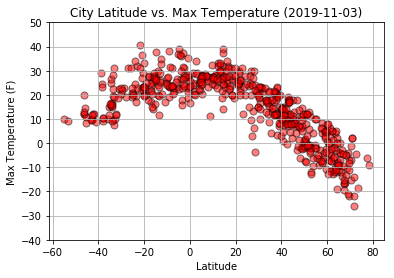

In [416]:

plt.scatter(x_axis,y_axis,alpha=0.5,color='red',edgecolors='black',s=50)
plt.ylim(-40,50)

plt.title(f'City Latitude vs. Max Temperature {date}')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Max Temperature.png'))
plt.show()

#### Latitude vs. Humidity Plot

In [428]:
y_axis = citydf['Humidity']

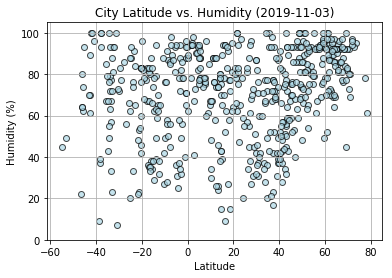

In [429]:
plt.scatter(x_axis,y_axis,alpha=0.7,c='lightblue',edgecolors='black')
plt.ylim(0,105)

plt.title(f'City Latitude vs. Humidity {date}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Humidity.png'))
plt.show()


#### Latitude vs. Cloudiness Plot

In [424]:
y_axis = citydf['Cloudiness']

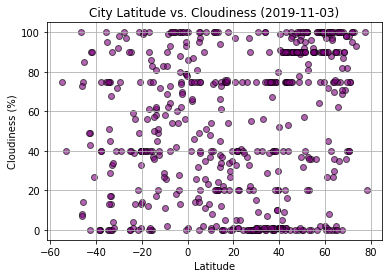

In [425]:
plt.scatter(x_axis,y_axis,alpha=0.6,c='purple',edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Cloudiness.png'))
plt.show()

#### Latitude vs. Wind Speed Plot

In [426]:
y_axis = citydf['Wind Speed (mph)']

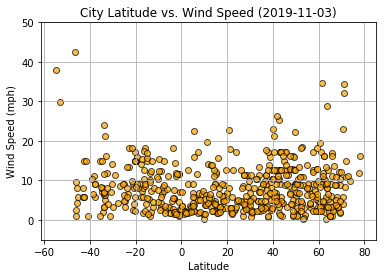

In [427]:
plt.scatter(x_axis,y_axis,alpha=0.7,c='orange',edgecolors='black')
plt.ylim(-5,50)
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig(os.path.join(f'City Latitude vs Wind Speed.png'))
plt.show()